We use this notebook to quickly inspect and verify the HI datacube.

In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sns
import pandas as pd
import numpy as np
import ipyvolume
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from IPython.display import HTML

# from pyhis import surveys, galaxies, core, helpers

# Load cube

In [35]:
filename = '../simulations/new_api_test/datacube.fits'

In [36]:
cube, header = fits.getdata(filename, header=True)

In [37]:
wcs = WCS(header)

# Look at 2D images

In [38]:
imkw = dict(
    origin='lower',
    interpolation='nearest',
    cmap='viridis')

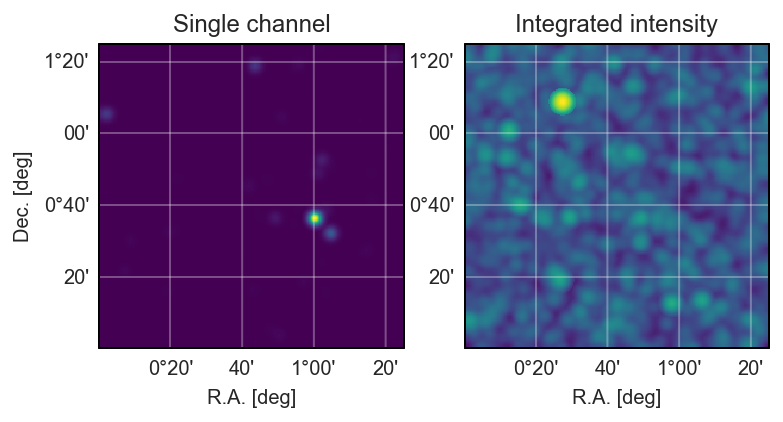

In [40]:
# prepare figure
fig = plt.figure()

# fig, (ax1, ax2) = plt.subplots(ncols=2, projection=wcs)
ax1 = fig.add_subplot(121, projection=wcs.celestial)
ax2 = fig.add_subplot(122, projection=wcs.celestial)

# slice
ax1.imshow(cube[np.random.randint(cube.shape[0])], **imkw)
ax1.set_title('Single channel')

# intensity over the full bandpass
ax2.imshow(np.log10(np.sum(cube, 0)), **imkw)
ax2.set_title('Integrated intensity')

for ax in (ax1, ax2):
    ax.grid(alpha=0.3)
    ax.set_xlabel('R.A. [deg]')
ax1.set_ylabel('Dec. [deg]')

# Look at the spectrum

In [43]:
nus = np.arange(header['CRVAL3'], header['CRVAL3'] + (header['NAXIS3'] * header['CDELT3']), header['CDELT3'])[:-1]

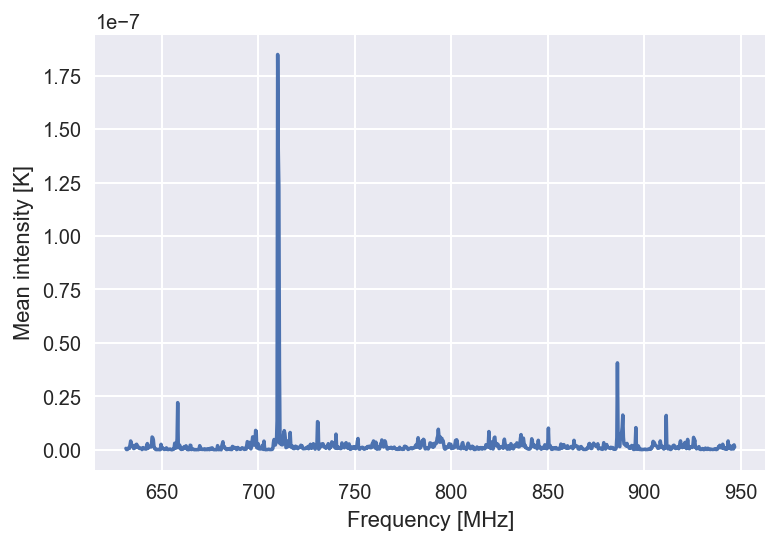

In [44]:
plt.plot(nus, np.mean(cube, axis=(1,2)))
plt.xlabel('Frequency [MHz]')
plt.ylabel('Mean intensity [K]');

# Look at a movie

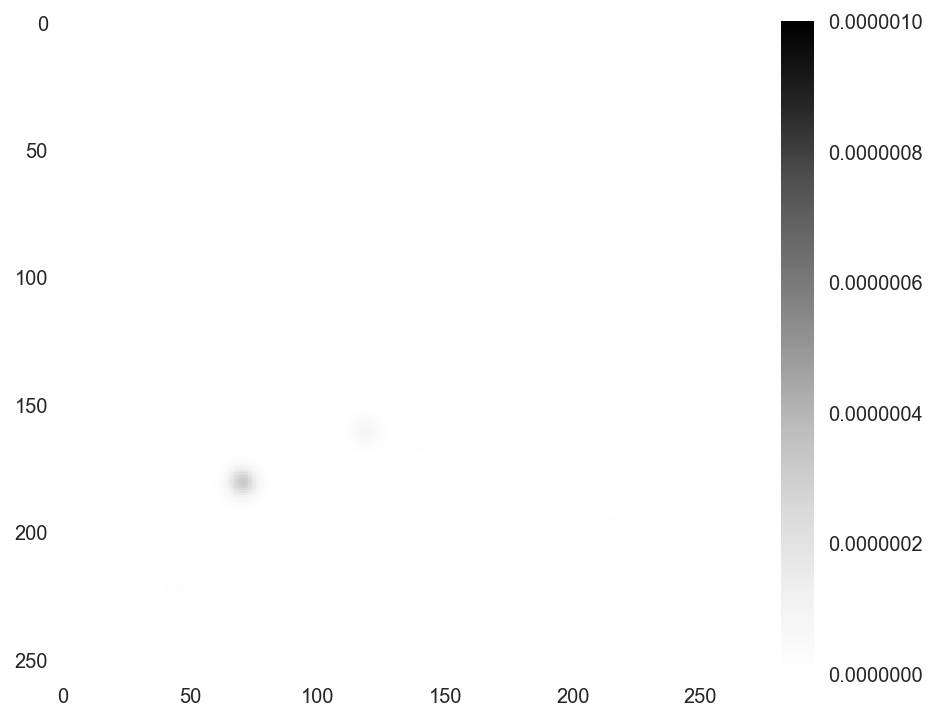

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))

ims = []
for i in range(cube.shape[0]):
    im = plt.imshow(cube[i], vmin=0., vmax=1.e-6, animated=True)
    ims.append([im])

cbar = plt.colorbar(im, ax=ax)
anim = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=1000)
HTML(anim.to_html5_video())
 

In [30]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [31]:
anim

# Look at 3D volume

In [ ]:
ipyvolume.quickvolshow(cube)#, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)